Python_test

In [1]:
import sys
print(sys.version)

3.10.11 | packaged by Anaconda, Inc. | (main, Apr 20 2023, 18:56:50) [MSC v.1916 64 bit (AMD64)]


In [2]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_

array([0.5, 0.5])

In [3]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

reg.coef_

reg.intercept_


0.1363636363636364

In [4]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])


reg.alpha_

0.01

In [5]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

reg.predict([[1, 1]])

array([0.8])

Computing regularization path using the LARS ...
.

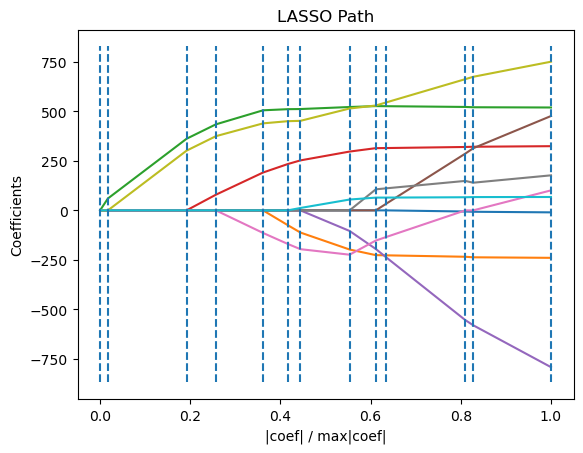

In [6]:
# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

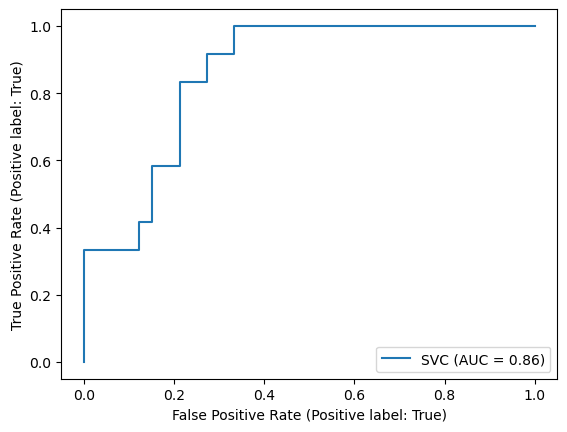

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
y = y == 2  # make binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)

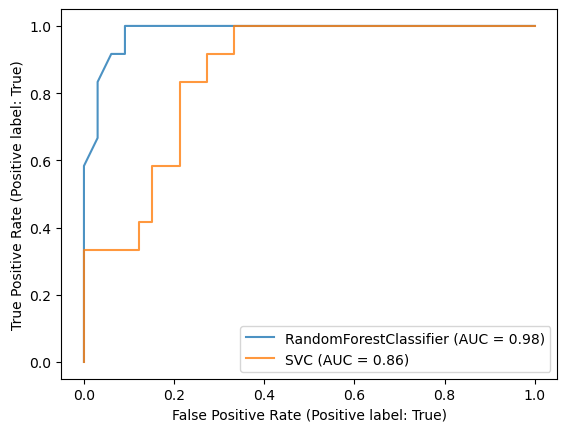

In [8]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)